In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_json("https://pomber.github.io/covid19/timeseries.json")

In [3]:
#taking a look at the structure of data for a specefic country
data["US"].head()

0    {'date': '2020-1-22', 'confirmed': 1, 'deaths'...
1    {'date': '2020-1-23', 'confirmed': 1, 'deaths'...
2    {'date': '2020-1-24', 'confirmed': 2, 'deaths'...
3    {'date': '2020-1-25', 'confirmed': 2, 'deaths'...
4    {'date': '2020-1-26', 'confirmed': 5, 'deaths'...
Name: US, dtype: object

In [4]:
#the objective is to create a table of countries and dates as columns with confirmed cases as values
data_to_use = pd.DataFrame()

In [5]:
#creating a dates column

#making a list of countries
countries = data.columns

dates = []
for x,y in zip(range(0,len(data)),countries):
    date_extracted = data[y][x]["date"]
    dates.append(date_extracted)
data_to_use["date"]=dates

In [6]:

#adding ccountries as columns
for i in countries:
    data_to_use[i] = 0
    data_to_use[i] = data_to_use[i].astype(float)

In [7]:
#updating values of cells to confirmed cases
for country in countries:
    for x in range(0,len(data)):
        data_to_use.at[x,country] = data[country][x]["confirmed"]
    

In [8]:
#previewing results
for i in countries:
    data_to_use[i].astype(float)
data_to_use.tail(20)

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Burundi,Sierra Leone,Malawi,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,Comoros,Tajikistan,Lesotho
116,2020-5-17,6664.0,946.0,7019.0,761.0,48.0,25.0,8068.0,4472.0,7054.0,...,23.0,505.0,70.0,290.0,6.0,235.0,128.0,11.0,1524.0,1.0
117,2020-5-18,7072.0,948.0,7201.0,761.0,50.0,25.0,8371.0,4823.0,7068.0,...,42.0,519.0,70.0,290.0,6.0,246.0,130.0,11.0,1729.0,1.0
118,2020-5-19,7653.0,949.0,7377.0,761.0,52.0,25.0,8809.0,5041.0,7072.0,...,42.0,534.0,70.0,290.0,6.0,251.0,167.0,11.0,1936.0,1.0
119,2020-5-20,8145.0,964.0,7542.0,762.0,52.0,25.0,9283.0,5271.0,7081.0,...,42.0,570.0,71.0,290.0,6.0,251.0,184.0,34.0,2140.0,1.0
120,2020-5-21,8676.0,969.0,7728.0,762.0,58.0,25.0,9931.0,5606.0,7095.0,...,42.0,585.0,72.0,481.0,6.0,251.0,197.0,34.0,2350.0,1.0
121,2020-5-22,9216.0,981.0,7918.0,762.0,60.0,25.0,10649.0,5928.0,7099.0,...,42.0,606.0,82.0,563.0,6.0,251.0,209.0,78.0,2551.0,2.0
122,2020-5-23,9998.0,989.0,8113.0,762.0,61.0,25.0,11353.0,6302.0,7114.0,...,42.0,621.0,82.0,655.0,6.0,251.0,212.0,78.0,2738.0,2.0
123,2020-5-24,10582.0,998.0,8306.0,762.0,69.0,25.0,12076.0,6661.0,7114.0,...,42.0,707.0,83.0,655.0,9.0,251.0,222.0,87.0,2929.0,2.0
124,2020-5-25,11173.0,1004.0,8503.0,763.0,70.0,25.0,12628.0,7113.0,7126.0,...,42.0,735.0,101.0,806.0,9.0,299.0,233.0,87.0,3100.0,2.0
125,2020-5-26,11831.0,1029.0,8697.0,763.0,70.0,25.0,13228.0,7402.0,7139.0,...,42.0,754.0,101.0,806.0,9.0,441.0,249.0,87.0,3266.0,2.0


In [9]:
cases_data_to_use_t = data_to_use.set_index(data_to_use["date"])
cases_data_to_use_t = data_to_use.transpose(copy = True)
cases_data_to_use_t.reset_index()
cases_data_to_use_t.to_csv("cases_data_to_use_t.csv", index_label = False)

In [10]:
#creating a new cases df
new_cases_to_use = data_to_use.copy()

#updating values to new cases
for country in countries:
    for x in range(1,len(data)):
        if data_to_use[country][x-1] != 0:
            new_cases_to_use.at[x,country] = data_to_use[country][x] - data_to_use[country][x-1]
        else: 
            new_cases_to_use.at[x,country] = data_to_use[country][x]
new_cases_to_use["Japan"]

0       2.0
1       0.0
2       0.0
3       0.0
4       2.0
       ... 
131    36.0
132    50.0
133    30.0
134    44.0
135    47.0
Name: Japan, Length: 136, dtype: float64

In [11]:
#creating a growth factor df
growth_data_to_use = new_cases_to_use.copy()

In [12]:
#updating values to growth factor
for country in countries:
    for x in range(1,len(data)):
        if new_cases_to_use[country][x-1] != 0:
            growth_data_to_use.at[x,country] = new_cases_to_use[country][x] / new_cases_to_use[country][x-1]
        else: 
            growth_data_to_use.at[x,country] = new_cases_to_use[country][x]

In [13]:
growth_data_to_use["Bahrain"].tail(10)

126    1.671795
127    1.104294
128    1.102778
129    0.866499
130    1.758721
131    0.781818
132    0.930233
133    1.145455
134    0.954365
135    1.120582
Name: Bahrain, dtype: float64

In [14]:
growth_data_to_use

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Burundi,Sierra Leone,Malawi,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,Comoros,Tajikistan,Lesotho
0,2020-1-22,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0
1,2020-1-23,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0
2,2020-1-24,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0
3,2020-1-25,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0
4,2020-1-26,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,4.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,2020-6-1,0.801471,0.400000,0.937008,1.000000,0.0,0.0,0.885400,0.591549,1.900000,...,0.0,0.444444,10.400000,0.0,0.0,0.25,2.384615,0.0,0.674797,0.0
132,2020-6-2,1.392661,3.500000,0.949580,79.000000,0.0,0.0,1.602837,2.461905,0.421053,...,0.0,7.750000,0.423077,0.0,0.0,0.00,1.451613,26.0,1.048193,0.0
133,2020-6-3,0.998682,0.952381,0.946903,0.088608,0.0,0.0,1.049779,0.996132,1.375000,...,0.0,0.419355,0.500000,0.0,0.0,0.00,0.444444,0.0,1.045977,2.0
134,2020-6-4,1.038259,0.650000,0.915888,0.142857,0.0,0.0,0.978925,1.353398,0.636364,...,0.0,0.384615,2.181818,0.0,0.0,1.00,1.700000,0.0,1.076923,0.0


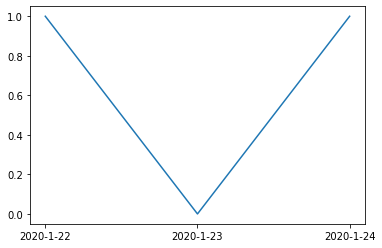

In [15]:
#plotting the data to preview
plt.plot(growth_data_to_use["date"][:3], growth_data_to_use["US"][:3] )

In [16]:
#saving growth as json
growth_data_to_use.to_json("growth.json")
#saving growth as csv
growth_data_to_use.to_csv("growth.csv")

In [17]:
#creating a decision tree for a tabel with an analysis of each country's infection rate
up_country = []
growth_factor = []
cases = []
analysis = []
avg_growth_factor_past_2_days = []
new_cases = []
for country in countries:

        
        if data_to_use[country][len(data)-10] == 0:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("New to The Pandemic") 
        elif data_to_use[country][len(data)-1] < 229 and growth_data_to_use[country][len(data)-1] <= 2 or (new_cases_to_use[country][len(data)-7] ==0 and new_cases_to_use[country][len(data)-3] ==0 and new_cases_to_use[country][len(data)-1] == 0):
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread Can Be Contained!")
        elif data_to_use[country][len(data)-1] < 2000 and ((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2) <1:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread is Possibly Getting Under Control!")
        elif data_to_use[country][len(data)-1] < 2000 and (growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2 <1.6:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread is Starting To Get Outta Hands!")
        elif data_to_use[country][len(data)-1] < 3000 and ((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2) <1:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread is Possibly Getting Under Control!")
        elif data_to_use[country][len(data)-1] < 3000 and (growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2 <1.6:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread is Starting To Get Outta Hands!")
        elif data_to_use[country][len(data)-1] > 3000 and ((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2 <1 and new_cases_to_use[country][len(data)-1] <229):
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread is Possibly Getting Under Control!")
        elif (data_to_use[country][len(data)-1] > 3000 and ((growth_data_to_use[country][len(data)-1] >1) or new_cases_to_use[country][len(data)-1] >229)) or (new_cases_to_use[country][len(data)-30] >0 and growth_data_to_use[country][len(data)-1]>1.5):
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread Has Gotten Out of Control!")
        else:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("Analysis is Pending Additional Data")



      
    
growth_chart_df = pd.DataFrame()
growth_chart_df["country"] = up_country
growth_chart_df["growth_factor"]= growth_factor
growth_chart_df["cases"]= cases
growth_chart_df["analysis"]= analysis
growth_chart_df["growth_factor_mod"]= avg_growth_factor_past_2_days
growth_chart_df["new_cases"] = new_cases


In [18]:
#checking the output snapshot, reviewing if the analysis falls in correctly and no rows are missed
growth_chart_df.sort_values(by = "cases")

,country,growth_factor,cases,analysis,growth_factor_mod,new_cases
187,Lesotho,0.000000,4.0,COVID-19 Spread Can Be Contained!,0.000000,0.0
116,Papua New Guinea,0.000000,8.0,COVID-19 Spread Can Be Contained!,0.000000,0.0
176,MS Zaandam,0.000000,9.0,COVID-19 Spread Can Be Contained!,0.000000,0.0
182,Western Sahara,0.000000,9.0,COVID-19 Spread Can Be Contained!,0.000000,0.0
132,Seychelles,0.000000,11.0,COVID-19 Spread Can Be Contained!,0.000000,0.0
...,...,...,...,...,...,...
138,Spain,0.952096,240978.0,COVID-19 Spread Has Gotten Out of Control!,0.899906,318.0
154,United Kingdom,0.914870,284734.0,COVID-19 Spread Has Gotten Out of Control!,0.939064,1655.0
124,Russia,0.988099,449256.0,COVID-19 Spread Has Gotten Out of Control!,1.011285,8718.0
21,Brazil,0.000000,614941.0,COVID-19 Spread is Possibly Getting Under Cont...,0.540024,0.0


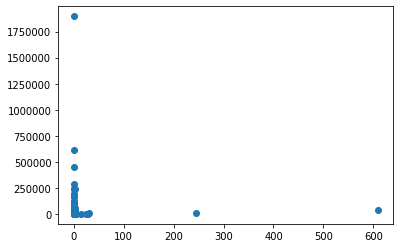

In [19]:
plt.scatter(growth_chart_df["growth_factor"],growth_chart_df["cases"])

In [20]:
growth_chart_df.to_csv("growth_category.csv")